_todo: Read in data._

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data

data = pd.read_csv('blueprinty.csv')

data.head()

,Unnamed: 0,patents,region,age,iscustomer
0,1,0,Midwest,32.5,0
1,786,3,Southwest,37.5,0
2,348,4,Northwest,27.0,1
3,927,3,Northeast,24.5,0
4,830,3,Southwest,37.0,0


In [3]:
# coutn the number of unique values in the column 'Unnamed: 0'

data['Unnamed: 0'].nunique()

1500

_todo: Compare histograms and means of number of patents by customer status. What do you observe?_


In [4]:
# count number of customers and non-customers

data[data['iscustomer']==1]['iscustomer'].count()


197

In [5]:
data[data['iscustomer']==0]['iscustomer'].count()

1303

Text(0.5, 1.0, 'Frequency of Patents for Customers')

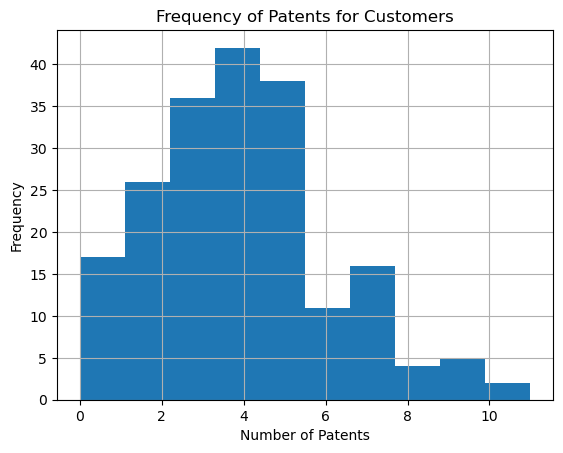

In [6]:
# make histogram of # of patents for Customers


data[data['iscustomer'] == 1]['patents'].hist()

plt.xlabel('Number of Patents')
plt.ylabel('Frequency')
plt.title('Frequency of Patents for Customers')


Text(0.5, 1.0, 'Frequency of Patents for Non-Customers')

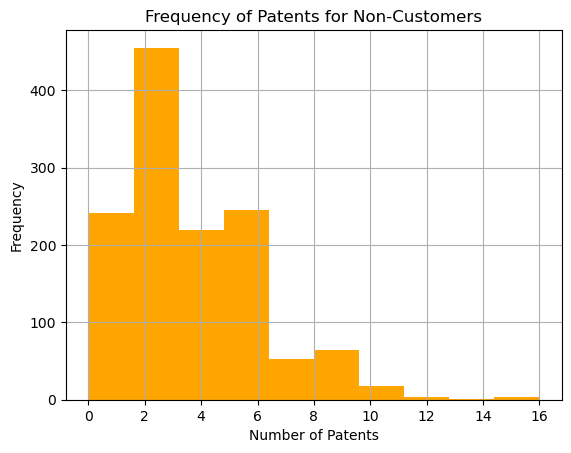

In [7]:
# make histogram of # of patents for Non-Customers

data[data['iscustomer'] == 0]['patents'].hist(color='orange')
plt.xlabel('Number of Patents')
plt.ylabel('Frequency')
plt.title('Frequency of Patents for Non-Customers')



The number of patents for customers is slightly skewed right, however it has a more normal distribution than the number of patents for non-customers.

Both plots have a large drop off around 6 patents (For customers it is slightly less than 6). The number of non-customers is significantly higher than the number of customers, totaling to 1303 non-customers and 197 customers. The mean number of patents for customers was 4.09 and the mean number of patents for non-customers was 3.62. This is a difference of about 0.5 patents.

In [8]:
mean_patents_customers = data[data['iscustomer'] == 1]['patents'].mean()
mean_patents_noncustomers = data[data['iscustomer'] == 0]['patents'].mean()

print('Mean patents for customers:', round(mean_patents_customers,2))
print('Mean patents for non-customers:', round(mean_patents_noncustomers,2))

Mean patents for customers: 4.09
Mean patents for non-customers: 3.62


_todo: Compare regions and ages by customer status. What do you observe?_

In [9]:
# group by region and count number of customers and non-customers

region = data.groupby('region')['iscustomer'].value_counts().unstack()
region['prop0'] = region[0]/(region[0].sum())
region['prop1'] = region[1]/(region[1].sum())
region


iscustomer,0,1,prop0,prop1
region,,,,
Midwest,207,17,0.158864,0.086294
Northeast,488,113,0.374520,0.573604
Northwest,171,16,0.131236,0.081218
South,171,20,0.131236,0.101523
Southwest,266,31,0.204144,0.157360


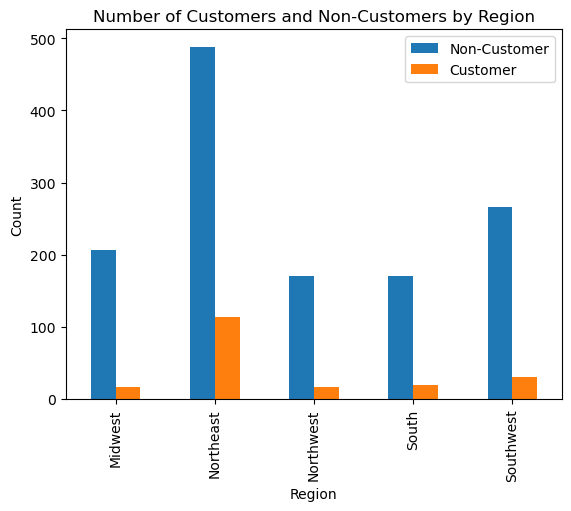

In [10]:
# create a plot of the number of customers and non-customers by region side by side

data.groupby('region')['iscustomer'].value_counts().unstack().plot(kind='bar', stacked=False)

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Customers and Non-Customers by Region')
plt.legend(['Non-Customer', 'Customer'])

The Northeast has by far the most customers and non-customers, and the number of non-customers in each region clearly outweighs the number of customers. Although ranking each respective customer and non-customer base by region comes out to be nearly the same ranking, the proportions are different. 

For the customers, nearly 60% are from the NE, while only 40% of non-customers are from the NE. 

In [11]:
# group by age with bins every 5 years and count number of customers and non-customers

data['age_bins'] = pd.cut(data['age'], bins=range(0, 60, 5))

age = data.groupby('age_bins')['iscustomer'].value_counts().unstack()
age['prop0'] = age[0]/(age[0].sum())
age['prop1'] = age[1]/(age[1].sum())
age


/tmp/ipykernel_16197/318244717.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age = data.groupby('age_bins')['iscustomer'].value_counts().unstack()


iscustomer,0,1,prop0,prop1
age_bins,,,,
"(0, 5]",0,0,0.000000,0.000000
"(5, 10]",3,3,0.002302,0.015228
"(10, 15]",52,15,0.039908,0.076142
"(15, 20]",213,53,0.163469,0.269036
"(20, 25]",318,51,0.244052,0.258883
"(25, 30]",301,32,0.231005,0.162437
"(30, 35]",244,24,0.187260,0.121827
"(35, 40]",135,13,0.103607,0.065990
"(40, 45]",34,5,0.026094,0.025381


/tmp/ipykernel_16197/3883190071.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('age_bins')['iscustomer'].value_counts().unstack().plot(kind='bar', stacked=False)


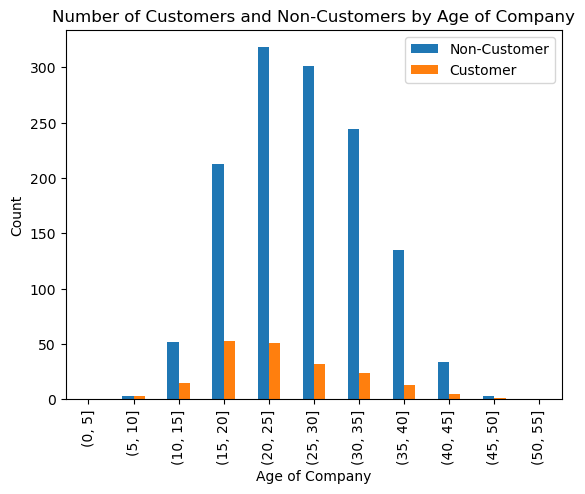

In [12]:

data.groupby('age_bins')['iscustomer'].value_counts().unstack().plot(kind='bar', stacked=False)
plt.xlabel('Age of Company')
plt.ylabel('Count')
plt.title('Number of Customers and Non-Customers by Age of Company')
plt.legend(['Non-Customer', 'Customer'])

In [13]:
# find mean age for customers and non-customers

mean_age_customers = data[data['iscustomer'] == 1]['age'].mean()
mean_age_noncustomers = data[data['iscustomer'] == 0]['age'].mean()


print('Mean age for customers:', round(mean_age_customers,2))
print('Mean age for non-customers:', round(mean_age_noncustomers,2))

Mean age for customers: 24.15
Mean age for non-customers: 26.69


In [14]:
# Calculate a 95% confidence interval for the mean age of customers and non-customers

import numpy as np

std_age_customers = data[data['iscustomer'] == 1]['age'].std()
std_age_noncustomers = data[data['iscustomer'] == 0]['age'].std()

n_customers = data[data['iscustomer'] == 1]['age'].count()
n_noncustomers = data[data['iscustomer'] == 0]['age'].count()

z = 1.96

ci_customers = z * (std_age_customers/np.sqrt(n_customers))
ci_noncustomers = z * (std_age_noncustomers/np.sqrt(n_noncustomers))

print('95% CI for mean age of customers:', round(mean_age_customers-ci_customers,2), round(mean_age_customers+ci_customers,2))
print('95% CI for mean age of non-customers:', round(mean_age_noncustomers-ci_noncustomers,2), round(mean_age_noncustomers+ci_noncustomers,2))

95% CI for mean age of customers: 23.09 25.21
95% CI for mean age of non-customers: 26.3 27.08


The most customers come from companies which are between 15-20 years old, with the average company age being about 24 years. The most non-customers come from companies which are between 20-25 years old, with the average company age being about 27 years.

The distribution of company ages for customers and non-customers resembles a normal distribution, with a slight skew to the right. The largest disparity between the two distributions is at the 10-15 year mark, where the % of non-customers is 10% lower than that of customers (16%, 26%).

The confidence interval for the mean age of customers is (23.1, 25.2) and the confidence interval for the mean age of non-customers is (26.3, 27.1).

Write down mathematically the likelihood for_ $Y \sim \text{Poisson}(\lambda)$. Note that $f(Y|\lambda) = e^{-\lambda}\lambda^Y/Y!$.

Code the likelihood (or log-likelihood) function for the Poisson model. This is a function of lambda and Y. For example:_


In [15]:
def poisson_log_likelihood(lam, y):
    """
    Compute the log likelihood of observing data y under a Poisson distribution with parameter lam.

    Parameters:
    - lam (float): The rate parameter (lambda) of the Poisson distribution.
    - y (array-like): Array of observed counts.

    Returns:
    - float: The log likelihood of observing the data given lam.
    """
    y = np.array(y)
    n = len(y)  # number of observations
    sum_y = np.sum(y)  # sum of all observed counts

    # Calculate each part of the log likelihood
    # log(P(Y|lam)) = -n * lam + sum_y * log(lam) - log(y_i!)
    # We use np.sum(np.log(y_factorials)) to sum log of factorials
    log_likelihood = -n * lam + sum_y * np.log(lam) - np.sum([np.log(np.math.factorial(i)) for i in y])
    return log_likelihood

In [16]:
years = range(1,11)
log_likelihood_values = []

for i in years:
    log_likelihood_value = poisson_log_likelihood(i, data['patents'])
    log_likelihood_values.append(log_likelihood_value)

log_likelihood_values

/tmp/ipykernel_16197/963855135.py:19: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  log_likelihood = -n * lam + sum_y * np.log(lam) - np.sum([np.log(np.math.factorial(i)) for i in y])


[-6548.886990069443,
 -4217.862523114625,
 -3476.856870600801,
 -3386.838056159808,
 -3653.52364804617,
 -4145.8324036459835,
 -4793.841596240727,
 -5555.81358920499,
 -6404.826751132159,
 -7322.4991810913525]

_todo: Use your function to plot lambda on the horizontal axis and the likelihood (or log-likelihood) on the vertical axis for a range of lambdas (use the observed number of patents as the input for Y).

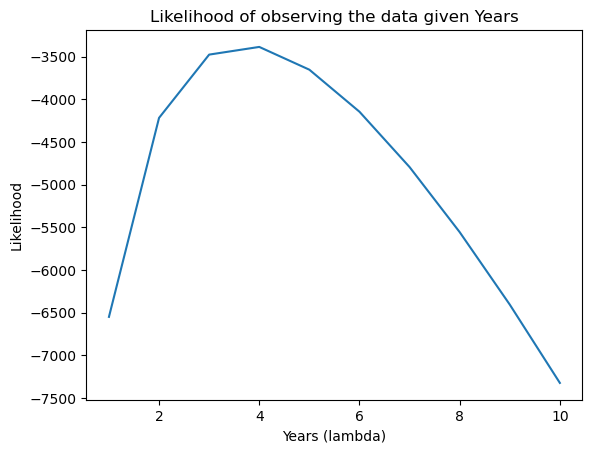

In [17]:
# _todo: Use your function to plot lambda on the horizontal axis and the likelihood (or log-likelihood) on the vertical axis for a range of lambdas (use the observed number of patents as the input for Y).

plt.plot(years, log_likelihood_values)
plt.xlabel('Years (lambda)')
plt.ylabel('Likelihood')
plt.title('Likelihood of observing the data given Years')
plt.show()

In [18]:
from scipy.optimize import minimize

def neg_poisson_log_likelihood(lam, y):
    """
    Compute the log likelihood of observing data y under a Poisson distribution with parameter lam.

    Parameters:
    - lam (float): The rate parameter (lambda) of the Poisson distribution.
    - y (array-like): Array of observed counts.

    Returns:
    - float: The log likelihood of observing the data given lam.
    """
    y = np.array(y)
    n = len(y)  # number of observations
    sum_y = np.sum(y)  # sum of all observed counts

    # Calculate each part of the log likelihood
    # log(P(Y|lam)) = -n * lam + sum_y * log(lam) - log(y_i!)
    # We use np.sum(np.log(y_factorials)) to sum log of factorials
    return -(-n * lam + sum_y * np.log(lam) - np.sum([np.log(np.math.factorial(i)) for i in y]))
    

In [19]:
mean = np.mean(data['patents'])

result = minimize(neg_poisson_log_likelihood, mean, args=(data['patents']), bounds = [(0, None)])

result

/tmp/ipykernel_16197/354120658.py:21: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return -(-n * lam + sum_y * np.log(lam) - np.sum([np.log(np.math.factorial(i)) for i in y]))


  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 3367.683772235094
        x: [ 3.685e+00]
      nit: 0
      jac: [ 0.000e+00]
     nfev: 2
     njev: 1
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

Next, we extend our simple Poisson model to a Poisson Regression Model such that $Y_i = \text{Poisson}(\lambda_i)$ where $\lambda_i = \exp(X_i'\beta)$. The interpretation is that the success rate of patent awards is not constant across all firms ($\lambda$) but rather is a function of firm characteristics $X_i$. Specifically, we will use the covariates age, age squared, region, and whether the firm is a customer of Blueprinty.

_todo: Update your likelihood or log-likelihood function with an additional argument to take in a covariate matrix X. Also change the parameter of the model from lambda to the beta vector. In this model, lambda must be a positive number, so we choose the inverse link function g() to be exp() so that_ $\lambda_i = e^{X_i'\beta}$. _For example:_

```
poisson_regression_likelihood <- function(beta, Y, X){
   ...
}

In [20]:
import numpy as np
from scipy.optimize import minimize
from scipy.special import factorial

def poisson_regression_log_likelihood(beta, Y, X):
 
    # Calculate lambda for each observation
    lambda_i = np.exp(np.dot(X, beta))
    
    # Calculate the log likelihood
    log_likelihood = np.sum(Y * np.log(lambda_i) - lambda_i - np.log(factorial(Y)))
    
    # Return the negative log likelihood
    return -log_likelihood

_todo: Use your function along with R's optim() or Python's sp.optimize() to find the MLE vector and the Hessian of the Poisson model with covariates. Specifically, the first column of X should be all 1's to enable a constant term in the model, and the subsequent columns should be age, age squared, binary variables for all but one of the regions, and the binary customer variable. Use the Hessian to find standard errors of the beta parameter estimates and present a table of coefficients and standard errors._


In [21]:
# convert regions column to binary columns

data = pd.get_dummies(data, columns=['region'])

In [22]:
data['age_squared'] = data['age']**2

In [23]:

n = len(data)  # Number of observations
X = np.c_[np.ones(n).tolist(), data['age'], data['age_squared'], data['iscustomer'], data['region_Midwest'], data['region_Northwest'],
          data['region_Northeast'], data['region_South']]
Y = data['patents']

# Initial guess for beta
initial_beta = np.zeros(X.shape[1])

# Minimization
result = minimize(poisson_regression_log_likelihood, initial_beta, args = (Y, X), method= 'BFGS')

print("Optimal beta:", result.x)
print("Success:", result.success)
print("Message:", result.message)

/tmp/ipykernel_16197/1165065463.py:8: RuntimeWarning: overflow encountered in exp
  lambda_i = np.exp(np.dot(X, beta))
/opt/conda/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


/opt/conda/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


Optimal beta: [0. 0. 0. 0. 0. 0. 0. 0.]
Success: False
Message: Desired error not necessarily achieved due to precision loss.


/tmp/ipykernel_16197/1165065463.py:8: RuntimeWarning: overflow encountered in exp
  lambda_i = np.exp(np.dot(X, beta))
/opt/conda/lib/python3.11/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [24]:
'''def debug_poisson_log_likelihood(beta, Y, X):
    eta = np.dot(X, beta)
    max_eta = np.max(eta)
    lambda_i = np.exp(eta - max_eta)
    log_lambda = eta - max_eta
    debug_info = {
        'max_eta': max_eta,
        'max_exp_term': np.max(lambda_i),
        'min_log_term': np.min(log_lambda)
    }
    print(debug_info)
    log_likelihood = np.sum(Y * eta - lambda_i * np.exp(max_eta) - gammaln(Y + 1))
    return -log_likelihood

# Run the optimization with debug function
result = minimize(debug_poisson_log_likelihood, initial_beta, args=(Y, X), method='BFGS')
'''

"def debug_poisson_log_likelihood(beta, Y, X):\n    eta = np.dot(X, beta)\n    max_eta = np.max(eta)\n    lambda_i = np.exp(eta - max_eta)\n    log_lambda = eta - max_eta\n    debug_info = {\n        'max_eta': max_eta,\n        'max_exp_term': np.max(lambda_i),\n        'min_log_term': np.min(log_lambda)\n    }\n    print(debug_info)\n    log_likelihood = np.sum(Y * eta - lambda_i * np.exp(max_eta) - gammaln(Y + 1))\n    return -log_likelihood\n\n# Run the optimization with debug function\nresult = minimize(debug_poisson_log_likelihood, initial_beta, args=(Y, X), method='BFGS')\n"

In [25]:
import numpy as np
from scipy.optimize import minimize
from scipy.special import gammaln, logsumexp

def poisson_regression_log_likelihood(beta, Y, X):
    eta = np.dot(X, beta)
    # Clip eta to prevent overflow in the exp() call, adjust max_eta based on domain knowledge
    eta = np.clip(eta, None, 20)  # Clip eta to a maximum of 20 to prevent overflow
    lambda_i = np.exp(eta)
    log_likelihood = np.sum(Y * eta - lambda_i - gammaln(Y + 1))
    return -log_likelihood

# Load and preprocess your data as before, ensuring that features are scaled
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Assuming 'age' and 'age_squared' need scaling
data['age'] = scaler.fit_transform(data[['age']])
data['age_squared'] = scaler.fit_transform(data[['age_squared']])

# Assuming that you already converted regions into dummy variables and set up the data correctly
X = np.c_[np.ones(len(data)), data['age'], data['age_squared'], data['iscustomer'], data['region_Midwest'], data['region_Northwest'],
          data['region_Northeast'], data['region_South']]
Y = data['patents'].values

# Initial guess for beta
initial_beta = np.zeros(X.shape[1])

# Minimization using a more controlled approach
result = minimize(poisson_regression_log_likelihood, initial_beta, args=(Y, X), method='BFGS')

print("Optimal beta:", result.x)
print("Success:", result.success)
print("Message:", result.message)


Optimal beta: [ 1.26678511  1.04646002 -1.14084548  0.11811439 -0.05134702 -0.07144126
  0.04724896  0.00582491]
Success: True
Message: Optimization terminated successfully.


In [26]:
# _todo: Check your results using R's glm() function or Python sm.GLM() function._

import statsmodels.api as sm

# Fit a Poisson regression model using statsmodels

poisson_model = sm.GLM(Y, X, family=sm.families.Poisson()).fit()

# Print the summary of the model

print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1492
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3275.9
Date:                Mon, 29 Apr 2024   Deviance:                       2178.8
Time:                        16:11:29   Pearson chi2:                 2.11e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1152
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2668      0.031     41.293      0.0

In [27]:
# Calculate Hessian at the optimal beta
from scipy.linalg import inv
hessian_inv = result.hess_inv  # Inverse Hessian is returned by BFGS

# Standard errors are the square roots of the diagonal elements of the inverse Hessian
std_errors = np.sqrt(np.diag(hessian_inv))

print("Standard Errors:", std_errors)

Standard Errors: [0.03187209 0.09687213 0.097367   0.04029995 0.0489745  0.05032832
 0.0386722  0.05010062]


We can conclude, based on our optimal beta's through our regression model, that Blueprinty's software has a positive effect on the number of patents awarded to a company. The coefficient or beta calculated for "iscustomer" is 0.11, meaning if they are a customer of the software, the humber of patents earned increases by 0.11. 

We also see that p-value of "iscustomer" is 0.002, meaning there is only a 0.2% chance that the coefficient has zero affect on the number of patents given the dataset. 